# Modeling with Regression Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
lm = LinearRegression()
lm

LinearRegression()

In [8]:
X = df[['highway-mpg']]
Y = df['price']

lm.fit(X,Y)
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [10]:
lm.intercept_

38423.305858157386

In [11]:
lm.coef_

array([-821.73337832])

In [12]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [14]:
X = df[['engine-size']]
Y = df['price']

lm1.fit(X,Y)

Yhat =lm1.predict(X)
Yhat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [17]:
lm1.intercept_

array([-7963.33890628])

In [18]:
lm1.coef_

array([[166.86001569]])

## Multiple Linear Regression

In [22]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = df['price']

lm.fit(Z,Y)

Yhat=lm.predict(Z)
Yhat[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

In [24]:
lm.intercept_

-15806.624626329198

In [25]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [26]:
lm2 = LinearRegression()
lm2

LinearRegression()

In [27]:
X2 = df[['normalized-losses','highway-mpg']]
Y = df['price']

lm2.fit(X2,Y)

Yhat=lm2.predict(X2)
Yhat[0:5]

array([16231.78938339, 16231.78938339, 17052.24372355, 13833.33798916,
       20396.97271047])

In [28]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [29]:
import seaborn as sns
%matplotlib inline 

(0.0, 48172.154811637316)

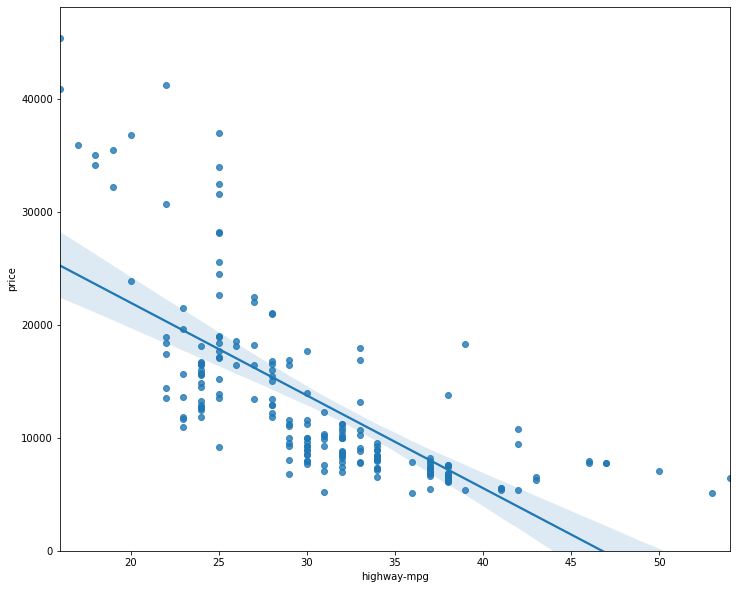

In [32]:
import matplotlib.pyplot as plt

width = 12
height = 10 

plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

(0.0, 47414.1)

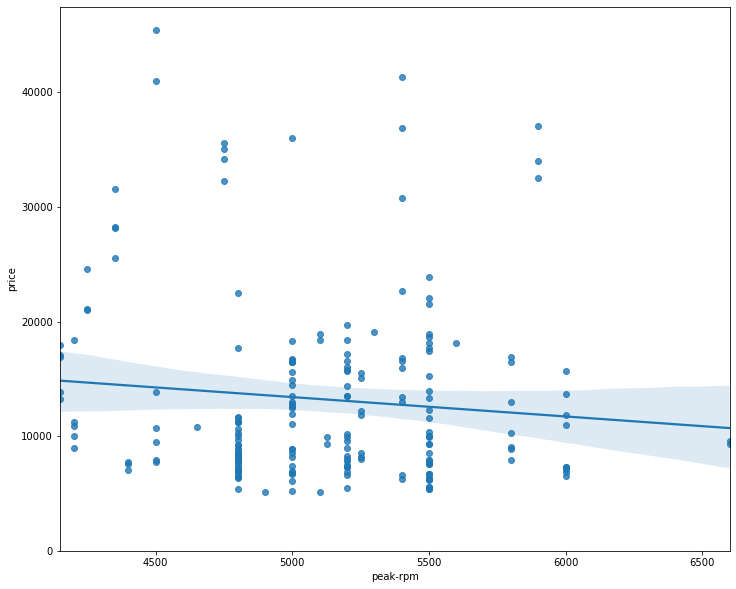

In [33]:
width = 12
height = 10 

plt.figure(figsize=(width, height))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

In [34]:
df[['peak-rpm', 'highway-mpg']].corr()

,peak-rpm,highway-mpg
peak-rpm,1.000000,-0.058598
highway-mpg,-0.058598,1.000000


## Residual Plot

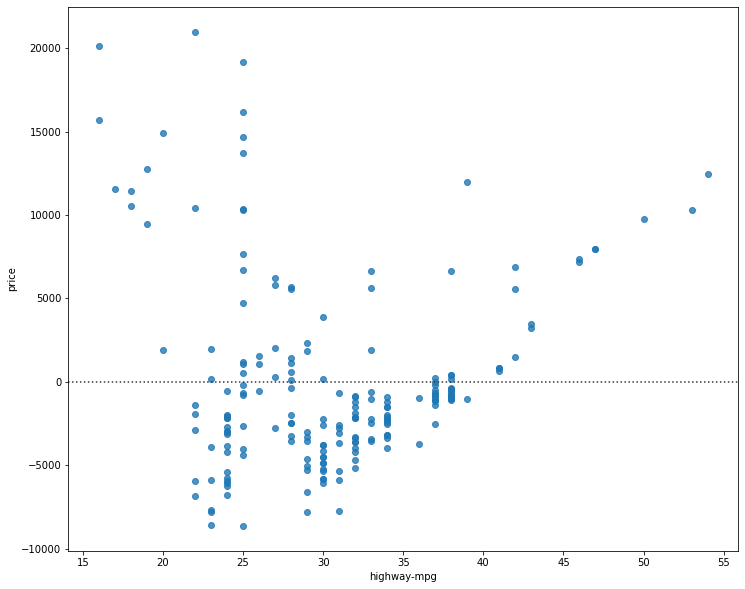

In [37]:
width = 12
height = 10 

plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

In [38]:
#Multiple linear Regression
Y_hat = lm.predict(Z)

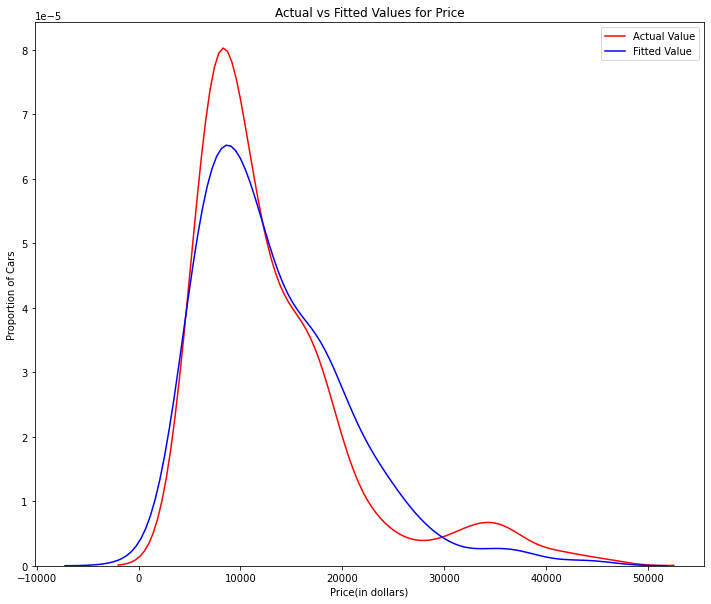

In [39]:
plt.figure(figsize=(width,height))

ax1 = sns.distplot(df['price'], hist=False, color='r', label = 'Actual Value')
sns.distplot(Y_hat, hist=False, color='b', label='Fitted Value')

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price(in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## Polynomial Regression

In [40]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [41]:
x = df['highway-mpg']
y = df['price']

f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


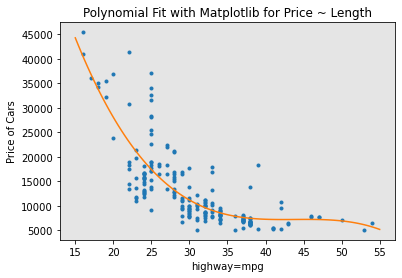

In [42]:
PlotPolly(p,x,y, 'highway=mpg')

In [43]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


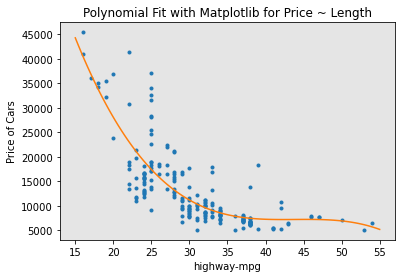

In [44]:
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f)
print(p1)

PlotPolly(p1, x, y, 'highway-mpg')

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
pr=PolynomialFeatures(degree=2)
pr

Z_pr=pr.fit_transform(Z)
Z.shape

(201, 4)

In [49]:
Z_pr.shape

(201, 15)

## Pipeline

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [51]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [52]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [53]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [54]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

## Measures for In-Sample Evaluation

In [55]:
#Simple Linear Regression 
lm.fit(X,Y)
print('The R-squares is: ', lm.score(X,Y))

The R-squares is:  0.7609686443622008


In [56]:
Yhat=lm.predict(X)
print("The output of the predicted value is :", Yhat[0:4])

The output of the predicted value is : [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.02517414


## Multiple Linear Regression

In [59]:
lm.fit(Z, df['price'])
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [60]:
Y_predict_multifit = lm.predict(Z)

print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


## Polynomial Fit

In [61]:
from sklearn.metrics import r2_score

r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906513


## MSE

In [62]:
mean_squared_error(df['price'], p(x))

20474146.42636125

## Prediction

In [63]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [64]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [65]:
lm.fit(X, Y)
lm

LinearRegression()

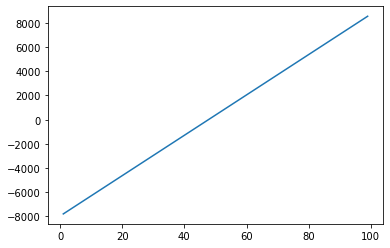

In [66]:
yhat = lm.predict(new_input)
yhat[0:5]

plt.figure()
plt.plot(new_input, yhat)
plt.show()